In [26]:
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"] = "1"

import numpy as np
import cv2
import imageio.v3 as imageio
import torch
import matplotlib.pyplot as plt

data_dir = '/home/jingkun/Dataset/CoFusion/'
sequence = 'car4-full'

color_dir = os.path.join(data_dir, sequence + '/', 'colour/')
depth_dir = os.path.join(data_dir, sequence + '/', 'depth_original/')

num_rgb_frames = len([f for f in os.listdir(color_dir) if os.path.isfile(color_dir + f)])
num_depth_frames = len([f for f in os.listdir(depth_dir) if os.path.isfile(depth_dir + f)])

print('Sequence {} contains {} RGB images and {} depth images.'.format(sequence, num_rgb_frames, num_depth_frames))

Sequence car4-full contains 480 RGB images and 480 depth images.


(540, 960, 3)


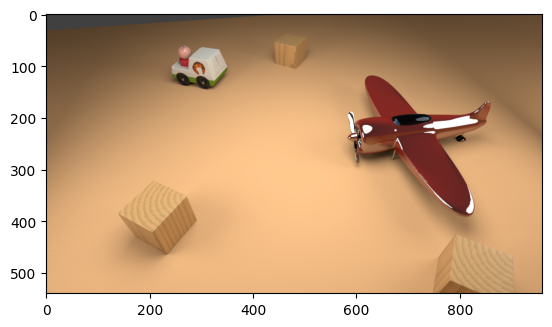

In [27]:
color = np.asarray(imageio.imread(color_dir + os.listdir(color_dir)[1]), dtype=float)
color = cv2.normalize(color, color, norm_type=cv2.NORM_MINMAX)
# test1 = '/home/jingkun/Dataset/ICL/living_room_traj2_frei_png/rgb/0.png'
# print(color)
# color = np.asarray(imageio.imread(test1), dtype=float)
print(color.shape)
fig = plt.figure()
plt.imshow(color)
plt.show()

In [28]:
# depth = cv2.imread(depth_dir + os.listdir(depth_dir)[1], cv2.IMREAD_UNCHANGED)
depth = cv2.imread(depth_dir + os.listdir(depth_dir)[200], cv2.IMREAD_UNCHANGED)
print(depth.dtype)
print(depth.shape)
print(depth)
# np.asarray(imageio.imread(os.listdir(depth_dir)[0]), dtype=np.int64)

float32
(540, 960)
[[1.4313228e+09 1.4324279e+09 1.4335333e+09 ... 2.2950013e+00
  2.2901490e+00 2.2853162e+00]
 [1.4319437e+09 1.4330501e+09 1.4341571e+09 ... 2.2938802e+00
  2.2890322e+00 2.2842040e+00]
 [1.4325629e+09 1.4336709e+09 1.4347793e+09 ... 2.2927601e+00
  2.2879167e+00 2.2830932e+00]
 ...
 [1.1667583e+00 1.1667508e+00 1.1667432e+00 ... 1.1598786e+00
  1.1598705e+00 1.1598623e+00]
 [1.1653463e+00 1.1653389e+00 1.1653312e+00 ... 1.1584837e+00
  1.1584753e+00 1.1584671e+00]
 [1.1639377e+00 1.1639302e+00 1.1639228e+00 ... 1.1570919e+00
  1.1570836e+00 1.1570753e+00]]


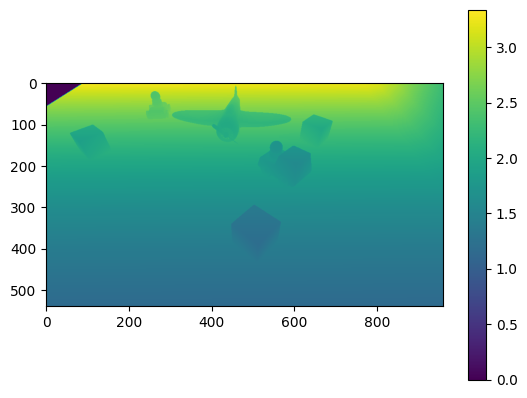

In [32]:
depth = np.asarray(imageio.imread(depth_dir + os.listdir(depth_dir)[200]), dtype=float)
depth[depth > 10] = 0
# depth = depth[:, :, 0]
fig = plt.figure()
plt.imshow(depth)
plt.colorbar()
plt.show()

In [4]:
row, col, channel = depth.shape
if depth.shape[2] == 3:
    new_depth = np.empty((row, col), dtype=np.float32).reshape(-1)
    depth_idx = 0
    for i in range(row):
        for j in range(col):
            new_depth[depth_idx] = depth[i][j][0]
            depth_idx += 1

new_depth = np.reshape(new_depth, (row, col))
print(new_depth.shape)

ValueError: not enough values to unpack (expected 3, got 2)

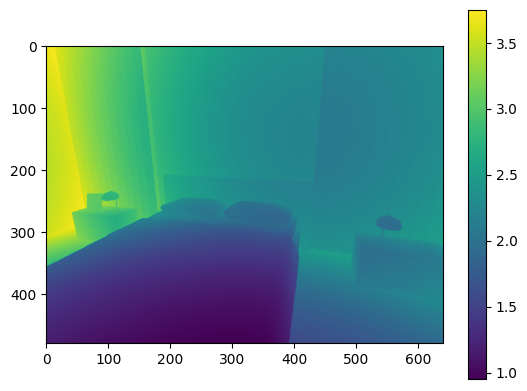

In [35]:
fig = plt.figure()
plt.imshow(new_depth)
plt.colorbar()
plt.show()

In [36]:
os.path.dirname(data_dir)

'/home/jingkun/Dataset/CoFusion'

In [41]:
dir_path = "/home/jingkun/Dataset/CoFusion/room4-full/trajectories/"
file_name = "gt-cam-0.txt"
file_path = os.path.join(dir_path, file_name)
with open(file_path, "r") as f:
    lines = f.readlines()

for line_num, line in enumerate(lines):
    line = line.strip().split()
    a = int(line[0])
    # print(a)
    print(os.path.normpath(os.path.join(dir_path[:-13], "colour/Color{0:04d}".format(int(line[0])))))

/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0001
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0002
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0003
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0004
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0005
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0006
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0007
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0008
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0009
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0010
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0011
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0012
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0013
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0014
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0015
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0016
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color00

In [42]:
a = np.array([0, 1, 2])
a[1:]

array([1, 2])

In [14]:
label = cv2.imread("/home/jingkun/Dataset/CoFusion/room4-full/mask_id/Mask0655.png")
label = 30 * label
label = cv2.resize(label, (320, 240), interpolation=cv2.INTER_NEAREST)
cv2.imshow("label", label)
cv2.waitKey(30000)
cv2.destroyAllWindows()

In [29]:
label_tensor = torch.from_numpy(label[:, :, 0]).to(torch.float32).requires_grad_()
ids, inverse_idx = torch.unique(label_tensor, return_inverse=True)
print(ids)
print(label_tensor.grad)

tensor([ 0., 30., 90.], grad_fn=<Unique2Backward0>)
None


In [43]:
idx = (ids == 1).nonzero(as_tuple=True)[0]
print(idx)
print(idx.nelement == 0)

tensor([], dtype=torch.int64)
False


In [45]:
print(*label_tensor.shape)

240 320


In [48]:
t = torch.randn((2, 3, 4, 5, 2))
print(t[:, :, 0].shape)
t[:, :, 0] = torch.ones((5, 2))
print(t[:, :, 0])

torch.Size([2, 3, 5, 2])
tensor([[[[1., 1.],
          [1., 1.],
          [1., 1.],
          [1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.],
          [1., 1.],
          [1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.],
          [1., 1.],
          [1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.],
          [1., 1.],
          [1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.],
          [1., 1.],
          [1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.],
          [1., 1.],
          [1., 1.],
          [1., 1.]]]])
